In [17]:
%matplotlib inline

import ROOT
from ROOT import TCanvas, TH1F, TLegend
#from NNDefs import build_and_train_class_nn
from LayersDefs import get_signal_and_background_frames, calculate_derived_et_columns, \
    roc_efficiencies, background_eff_at_target_signal_eff, manual_train_1d, \
    min_manual_eff_1d, manual_train_2d, min_manual_eff_2d
from sklearn.model_selection import train_test_split
import math
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm_notebook as tqdm

In [18]:
#random.seed(7)
#np.random.seed(7)

total_steps = 101

weight_steps = [0.1 * i for i in range(total_steps)]

ninety_percent_efficiencies = np.ones([total_steps])

In [19]:
signal_frame, background_frame = get_signal_and_background_frames()

calculate_derived_et_columns(signal_frame, background_frame)

In [20]:
signal_events = len(signal_frame)

# Find number of signal events that must be cut to fall below 90% efficiency
sig_events_to_cut = math.ceil(signal_events * 0.1)

print(sig_events_to_cut)

408


In [21]:
calculate_derived_et_columns(signal_frame, background_frame, layer_weights=[1, 1], column_names=['L0Et', 'L1Et'],
                                     output_column_name='L0+L1Et')
calculate_derived_et_columns(signal_frame, background_frame, layer_weights=[1, 1], column_names=['L2Et', 'L3Et'],
                                     output_column_name='L2+L3Et')
calculate_derived_et_columns(signal_frame, background_frame, layer_weights=[1, 1, 1], column_names=['L2Et', 'L3Et', 'HadEt'],
                                     output_column_name='L2+L3+HadEt')
calculate_derived_et_columns(signal_frame, background_frame, layer_weights=[1, 1, 1, 1], column_names=['L0Et', 'L1Et', 'L2Et', 'L3Et'],
                                     output_column_name='EMEt')

In [22]:
efficiencies_1d = manual_train_1d(signal_frame, background_frame, ['EMEt', 'HadEt'], weight_steps)

In [23]:
min_eff_1d, min_weight_1d = min_manual_eff_1d(efficiencies_1d, weight_steps)

print(min_eff_1d)
print(min_weight_1d)

0.133513881446509
5.9


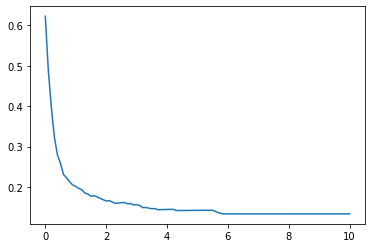

In [24]:
plt.plot(weight_steps, efficiencies_1d)
plt.show()

In [25]:
efficiencies_2d = manual_train_2d(signal_frame, background_frame, ['L0+L1Et', 'L2+L3Et', 'HadEt'], weight_steps)

In [54]:
x_steps, y_steps = np.meshgrid(weight_steps, weight_steps)

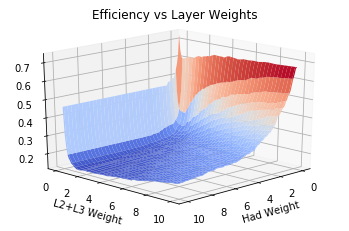

In [64]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x_steps, y_steps, ninety_percent_efficiencies_2d, cmap=cm.coolwarm)
ax.set_title('Efficiency vs Layer Weights')
ax.set_xlabel('Had Weight')
ax.set_ylabel('L2+L3 Weight')
# ax.set_zlabel('Background Efficiency')
ax.view_init(elev=20, azim=45)

In [26]:
min_eff, min_l2l3, min_had = min_manual_eff_2d(efficiencies_2d, weight_steps)
print(min_eff)
print(min_l2l3)
print(min_had)

0.1278222711407841
1.3
8.4


In [7]:
total_steps = 101

weight_steps = [0.1 * i for i in range(total_steps)]

min_eff = float('inf')
min_i = 0
min_j = 0
min_k = 0
min_l = 0

for l1weight in tqdm(range(total_steps)):
    for j in range(total_steps):
        for k in range(total_steps):
            for l in range(total_steps):
                l0_weight = weight_steps[i]
                l2_weight = weight_steps[j]
                l3_weight = weight_steps[k]
                had_weight = weight_steps[l]
        
                calculate_derived_et_columns(signal_frame, background_frame, layer_weights=[l0_weight, 1, l2_weight, l3_weight, had_weight], 
                                     column_names=['L0Et', 'L1Et', 'L2Et', 'L3Et', 'HadEt'], output_column_name='TotalEt')

                end_background_efficiency = background_eff_at_target_signal_eff(signal_frame, background_frame, 'TotalEt', 0.9)
    
                if end_background_efficiency == 0:
                    continue
                if end_background_efficiency < min_eff:
                    min_eff = end_background_efficiency
                    min_i = i
                    min_j = j
                    min_k = k
                    min_l = l

print(end_background_efficiency)
print(min_i)
print(min_j)
print(min_k)
print(min_l)

L1Weight0



NameError: name 'i' is not defined

In [1]:
total_steps = 41

weight_steps = [0.2 * i for i in range(total_steps)]

In [10]:
print(weight_steps)

[0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2000000000000002, 1.4000000000000001, 1.6, 1.8, 2.0, 2.2, 2.4000000000000004, 2.6, 2.8000000000000003, 3.0, 3.2, 3.4000000000000004, 3.6, 3.8000000000000003, 4.0, 4.2, 4.4, 4.6000000000000005, 4.800000000000001, 5.0, 5.2, 5.4, 5.6000000000000005, 5.800000000000001, 6.0, 6.2, 6.4, 6.6000000000000005, 6.800000000000001, 7.0, 7.2, 7.4, 7.6000000000000005, 7.800000000000001, 8.0]


In [ ]:
min_eff = float('inf')
min_i = 0
min_j = 0
min_k = 0
min_l = 0

# for i in tqdm(range(total_steps)):
#     file_name = f'4DManualWeights/L1Weight{i}.txt'
#     with open(file_name, 'a+') as f:
#         f.seek(0)
#         lines = f.readlines()
#         num_of_lines = len(lines)
#     if num_of_lines < total_steps ** 3:
#         with open(file_name, 'w') as f:
#             for j in range(total_steps):
#                 for k in range(total_steps):
#                     for l in range(total_steps):
#                         l0_weight = weight_steps[i]
#                         l2_weight = weight_steps[j]
#                         l3_weight = weight_steps[k]
#                         had_weight = weight_steps[l]

#                         calculate_derived_et_columns(signal_frame, background_frame, layer_weights=[l0_weight, 1, l2_weight, l3_weight, had_weight], 
#                                      column_names=['L0Et', 'L1Et', 'L2Et', 'L3Et', 'HadEt'], output_column_name='TotalEt')

#                         end_background_efficiency = background_eff_at_target_signal_eff(signal_frame, background_frame, 'TotalEt', 0.9)

#                         loop_identifier = 'i={} j={} k={} l={}'.format(i, j, k, l)
#                         f.write('{} - {}\n'.format(end_background_efficiency, loop_identifier))
#     else:
#         print(f'Skipping i = {i}')
#         continue

In [ ]:
min_eff = float('inf')
min_i = 0
min_j = 0
min_k = 0
min_l = 0
for i in range(total_steps):
    file_name = f'4DManualWeights/L1Weight{i}.txt'
    
    with open(file_name, 'r') as f:
        for line in f.readlines():
            split_line = line.split('=')
            efficiency = float(split_line[0][:-3])
            j = int(split_line[2][:-2])
            k = int(split_line[3][:-2])
            l = int(split_line[4])    
        
            if efficiency == 0:
                continue
            if efficiency < min_eff:
                min_eff = efficiency
                min_i = i
                min_j = j
                min_k = k
                min_l = l

print(min_eff)
print(min_i)
print(min_j)
print(min_k)
print(min_l)

In [40]:
l0l1_weight = 1
l2l3_weight = 4
had_weight = 5

j = l2l3_weight * 10
k = had_weight * 10

#print(weight_steps[20])
print(ninety_percent_efficiencies[j])
print(ninety_percent_efficiencies_2d[j][k])

total_steps_4d = 41
weight_steps_4d = [0.2 * i for i in range(total_steps)]

l = l2l3_weight * 5
m = had_weight * 5

#print(weight_steps_4d[10])

file_name = f'4DManualWeights/L1Weight5.txt'
with open(file_name, 'r') as f:
    lines = f.readlines()
line_num = l * 41 * 41 + l * 41 + m
print(lines[line_num].split('-')[0])

0.1818998102796565
0.16899593042621905
0.16899593042621905 
